In [2]:
import pandas as pd
import numpy as np
import statsmodels
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, ensemble, pipeline, feature_selection, tree, preprocessing, linear_model, metrics
import matplotlib.pyplot as plt

/Users/JoungHWon/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('data/drybeandata.csv')
columns = df[5:22]
columns = columns["% Citation Request"]
columns_l = []
for c in columns:
    columns_l.append(c[10:].split("/")[0])
columns_l

[' Area',
 ' Perimeter',
 ' MajorAxisLength',
 ' MinorAxisLength',
 ' AspectRation',
 ' Eccentricity',
 ' ConvexArea',
 ' EquivDiameter',
 ' Extent',
 ' Solidity',
 ' roundness',
 ' Compactness',
 ' ShapeFactor1',
 ' ShapeFactor2',
 ' ShapeFactor3',
 ' ShapeFactor4',
 ' Class']

In [4]:
df_clean = pd.DataFrame(df[24:]).reset_index(drop=True)
df_clean.columns = columns_l
df_clean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.1781167,173.888747,1.197191424,0.5498121871,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.5247957,182.7344194,1.097356461,0.4117852514,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.8261299,175.9311426,1.209712656,0.5627273168,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.5165157,1.153638059,0.4986159764,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.8478822,190.2792788,1.06079802,0.3336796578,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.9447054,1.55272833,0.765002201,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.5763923,190.7131365,1.476439419,0.7357022183,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.5399279,191.1879789,1.472581747,0.7340647812,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.3826364,190.2757308,1.489326228,0.741054787,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
classes = []
for d in df_clean.groupby(by = ' Class'):
    classes.append(d[0])
i = 0
while i < len(classes):
    print(classes[i], i)
    df_clean = df_clean.replace(classes[i], i)
    i+=1
df_clean    

BARBUNYA 0
BOMBAY 1
CALI 2
DERMASON 3
HOROZ 4
SEKER 5
SIRA 6


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.1781167,173.888747,1.197191424,0.5498121871,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,5
1,28734,638.018,200.5247957,182.7344194,1.097356461,0.4117852514,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,5
2,29380,624.11,212.8261299,175.9311426,1.209712656,0.5627273168,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,5
3,30008,645.884,210.557999,182.5165157,1.153638059,0.4986159764,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,5
4,30140,620.134,201.8478822,190.2792788,1.06079802,0.3336796578,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.9447054,1.55272833,0.765002201,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,3
13607,42101,757.499,281.5763923,190.7131365,1.476439419,0.7357022183,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,3
13608,42139,759.321,281.5399279,191.1879789,1.472581747,0.7340647812,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,3
13609,42147,763.779,283.3826364,190.2757308,1.489326228,0.741054787,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,3


In [6]:
features = columns_l[:len(columns_l) - 1]

In [7]:
xval = model_selection.KFold(10, shuffle=True)

fold_predictions = []
fold_acc = []
model = tree.DecisionTreeClassifier(min_samples_leaf=7)

for train_i, test_i in xval.split(df_clean):

    train_df = df_clean.iloc[train_i]
    test_df = df_clean.iloc[test_i]
    
    model.fit(train_df[features], train_df[' Class'])
    pred = model.predict(test_df[features])
    acc = metrics.cohen_kappa_score(pred, test_df[' Class'])
    
    fold_predictions.append(pred)
    fold_acc.append(acc)


acc_mean = np.mean(fold_acc)
acc_sd = np.std(fold_acc)

In [8]:
test_df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
9,30834,631.934,217.2278128,180.8974686,1.2008339,0.5536422247,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,5
28,31768,650.954,220.9594949,183.2920681,1.205504947,0.5584652592,32173,201.117562,0.777674,0.987412,0.942105,0.910201,0.006955,0.002945,0.828466,0.998720,5
46,32213,658.216,221.4811143,185.2954324,1.195286422,0.5477843666,32585,202.521272,0.762907,0.988584,0.934338,0.914395,0.006876,0.002965,0.836119,0.999401,5
70,32713,660.043,215.4163208,193.4864621,1.113340533,0.4395915601,33020,204.086955,0.799516,0.990703,0.943595,0.947407,0.006585,0.003273,0.897580,0.999312,5
77,32829,658.101,221.5995,189.0026275,1.172467827,0.5220712626,33154,204.448480,0.789785,0.990197,0.952538,0.922604,0.006750,0.003017,0.851197,0.998001,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13586,41875,760.096,287.8177877,185.5868555,1.550852225,0.7643456291,42172,230.904539,0.800088,0.992957,0.910810,0.802259,0.006873,0.001756,0.643620,0.998160,3
13591,41964,756.887,287.164102,186.2711081,1.541645964,0.7610805675,42310,231.149788,0.798706,0.991822,0.920502,0.804940,0.006843,0.001772,0.647928,0.998875,3
13595,41995,765.763,284.0731778,188.5919566,1.506284695,0.7478345695,42477,231.235150,0.732514,0.988653,0.899951,0.813999,0.006764,0.001832,0.662594,0.998055,3
13601,42042,771.515,288.0826741,186.3470896,1.545946732,0.7626148646,42476,231.364511,0.816254,0.989782,0.887574,0.803118,0.006852,0.001758,0.644999,0.997134,3


In [267]:
model = ensemble.RandomForestClassifier(max_depth=7, random_state=0)
X = df_clean[features]
y = df_clean[' Class']
model.fit(X, y)

xval = model_selection.KFold(10, shuffle=True)


pipe = pipeline.Pipeline([
    ('fs',feature_selection.SelectFromModel(
        model, threshold='median')),
    ('model', model)
])


result = model_selection.cross_validate(pipe, df_clean[features], df_clean[" Class"],
    cv=xval, scoring='accuracy', return_train_score=True, return_estimator = True)
    
acc = result['test_score'].mean

In [1]:
feature_importance = pipe.steps[1][1].feature_importances_
print(acc)

NameError: name 'pipe' is not defined

In [251]:
feature_names = pipe[-1].feature_names_in_

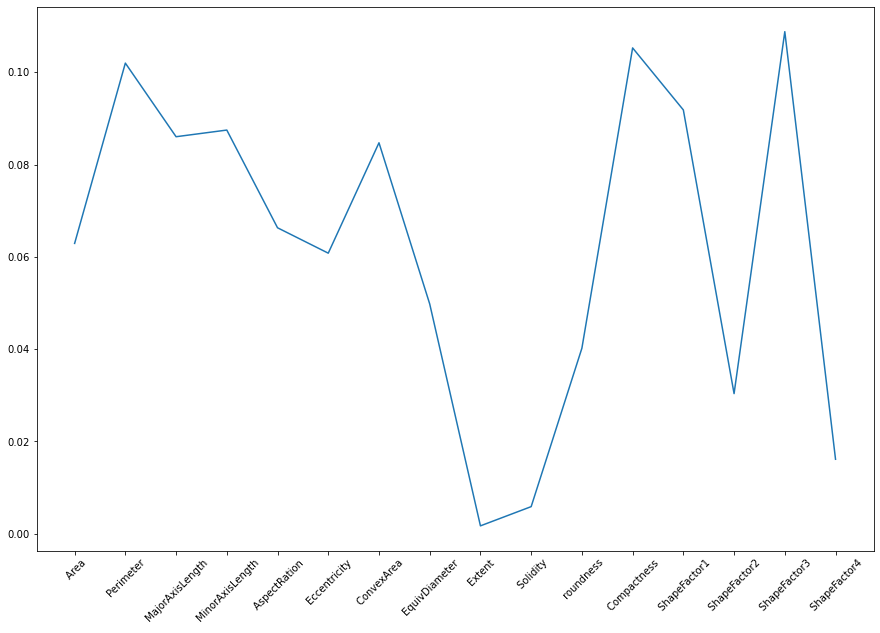

In [252]:
plt.figure(figsize=(15,10))
plt.xticks(rotation = 45)
plt.plot(feature_names, feature_importance)

In [254]:
test_acc_sd

0.007443996183728564

In [3]:
temp_df = pd.DataFrame({'col1':[1,2,3],'col2':[0,2,4]})

In [9]:
temp_df2 = pd.DataFrame({'col1':[3,2,1], 'col2':[4,2,0]})

In [16]:
pd.concat([temp_df, temp_df2])

,col1,col2
0,1,0
1,2,4
2,3,4
0,3,4
1,2,2
2,1,0
